In [38]:
import matplotlib.pyplot as plt
import pytz
from datetime import datetime
import pyart
import nexradaws
import cartopy.crs as ccrs
import numpy as np
import os
import re


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [10]:
import boto3
from botocore.handlers import disable_signing

In [15]:
s3 = boto3.resource('s3')
s3.meta.client.meta.events.register('choose-signer.s3.*', disable_signing)
bucket = s3.Bucket('unidata-nexrad-level3')

In [55]:
potential_keys = ['N0Q', 'N1P', 'N3P', 'DPA', 'OHA', 'DAA']

In [63]:
oct_data = []

for key in potential_keys:
    prefix = 'FTG_' + key
    n = 0
    last = ''
    for object_summary in bucket.objects.filter(Prefix = prefix + '_2024_10'):
        n += 1
        last = object_summary.key
    print(key)
    print(n)
    print(last)

N0Q
0

N1P
0

N3P
0

DPA
2863
FTG_DPA_2024_10_15_01_54_05
OHA
2864
FTG_OHA_2024_10_15_01_54_05
DAA
2864
FTG_DAA_2024_10_15_01_54_05


In [65]:
for object_summary in bucket.objects.filter(Prefix = 'FTG_DAA_2024_08_19'):
    print(object_summary.key)

FTG_DAA_2024_08_19_00_03_33
FTG_DAA_2024_08_19_00_08_00
FTG_DAA_2024_08_19_00_12_40
FTG_DAA_2024_08_19_00_17_09
FTG_DAA_2024_08_19_00_21_37
FTG_DAA_2024_08_19_00_26_19
FTG_DAA_2024_08_19_00_30_54
FTG_DAA_2024_08_19_00_35_36
FTG_DAA_2024_08_19_00_40_17
FTG_DAA_2024_08_19_00_45_00
FTG_DAA_2024_08_19_00_49_43
FTG_DAA_2024_08_19_00_54_11
FTG_DAA_2024_08_19_00_58_39
FTG_DAA_2024_08_19_01_03_07
FTG_DAA_2024_08_19_01_07_15
FTG_DAA_2024_08_19_01_11_21
FTG_DAA_2024_08_19_01_15_41
FTG_DAA_2024_08_19_01_20_02
FTG_DAA_2024_08_19_01_24_24
FTG_DAA_2024_08_19_01_28_28
FTG_DAA_2024_08_19_01_33_04
FTG_DAA_2024_08_19_01_37_24
FTG_DAA_2024_08_19_01_43_01
FTG_DAA_2024_08_19_01_47_20
FTG_DAA_2024_08_19_01_51_38
FTG_DAA_2024_08_19_01_55_58
FTG_DAA_2024_08_19_02_00_42
FTG_DAA_2024_08_19_02_05_23
FTG_DAA_2024_08_19_02_09_42
FTG_DAA_2024_08_19_02_14_02
FTG_DAA_2024_08_19_02_18_20
FTG_DAA_2024_08_19_02_22_40
FTG_DAA_2024_08_19_02_27_22
FTG_DAA_2024_08_19_02_31_51
FTG_DAA_2024_08_19_02_36_15
FTG_DAA_2024_08_19_0

In [78]:
fname = 's3://unidata-nexrad-level3/FTG_DAA_2024_08_19_23_56_06'

rain = pyart.io.read_nexrad_level3(fname)

In [79]:
print(rain.fields)

{'radar_estimated_rain_rate': {'units': 'inches/hour', 'standard_name': 'radar_estimated_rain_rate', 'long_name': 'Radar estimated rain rate', 'coordinates': 'elevation azimuth range', '_FillValue': -9999.0, 'data': masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)}}


In [80]:
disp = pyart.graph.RadarMapDisplay(rain)

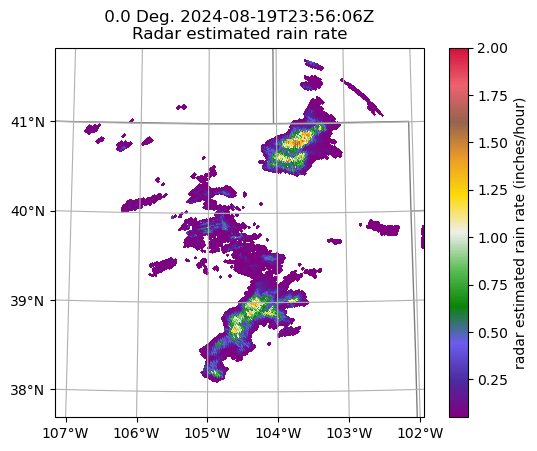

In [83]:
disp.plot_ppi_map('radar_estimated_rain_rate', vmin=0.05, vmax=2, mask_outside=True)

In [84]:
daa_available = [object_summary.key for object_summary in bucket.objects.filter(Prefix = 'FTG_DAA_2024_08_19')]

In [85]:
len(daa_available)

279

In [ ]:
for fname in daa_available:
    radar_file = 's3://unidata-nexrad-level3/' + fname
    rain = pyart.io.read_nexrad_level3(fname)
    